In [110]:
print(__doc__)

# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

'''
n=11
eg = pd.read_csv('EG.csv')
x=pd.DataFrame(eg['x'])
y=pd.DataFrame(eg['y'])
x.pop(0)
print(x)
x.info()
'''


Automatically created module for IPython interactive environment


"\nn=11\neg = pd.read_csv('EG.csv')\nx=pd.DataFrame(eg['x'])\ny=pd.DataFrame(eg['y'])\nx.pop(0)\nprint(x)\nx.info()\n"

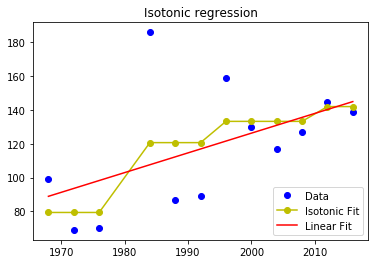

In [41]:
n = 12
x = np.array([1968, 1972, 1976, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016])
y = np.array([99, 69, 70, 186, 87, 89, 159, 130, 117, 127, 145, 139])

# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))
p=(255,255,0)
fig = plt.figure()
plt.plot(x, y, 'b.', markersize=12)
plt.plot(x, y_, 'y.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'r-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')

plt.show()

In [108]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x for x in range(1, 100)]
print(data)
#[1968, 1972, 1976, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

Default SE = 0.500
Reweighted SE = 0.556


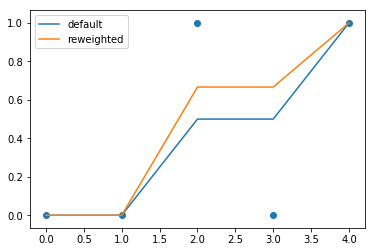

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 0, 1, 0, 1])

ir = IsotonicRegression()
ir.fit(x, y)
y_pred = ir.predict(x)

squared_error = np.sum((y - y_pred)**2)
print("Default SE = %0.3f" % squared_error)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, label="default")

# force IR to do the right thing by artificially up-weighting the data
sample_weight = np.array([1.0, 2.0, 2.0, 1.0, 1.0])
ir.fit(x, y, sample_weight=sample_weight)
y_pred = ir.predict(x)

squared_error = np.sum((y - y_pred)**2)
print("Reweighted SE = %0.3f" % squared_error)

ax.plot(x, y_pred, label="reweighted")
ax.legend()
plt.show()

In [67]:

# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x for x in range(1, 100)]
print(data)
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[99.]


In [111]:

# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [99, 69, 70, 186, 87, 89, 159, 130, 117, 127, 145, 139]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[118.08333426]


In [81]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
 v1 = random()
 row = [v1]
 data.append(row)
 data_exog = [x  for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

ValueError: Only gave one variable to VAR

60.0


[8.07677665]
